# Homework:

1. Using the data set built during class, write a short script that fits all of the models, estimating the $\beta$'s for every etf.
2. Write a function that takes in the data set, estimates the betas, and prints to the screen a table containing the beta for each etf.
2. Choose one stock and print to the screen the predicted returns as a function of market returns.
3. Create two time series, each starting at $1$, and simulate their values under the predicted returns and true returns. Comment on the differences.

In [2]:
# 1. Using the data set built during class, write a short 
# script that fits all of the models, estimating the $\beta$'s
# for every etf.
mydir <- "/home/tmabbot/MEGA/Teaching/Programming/Courses/Week7/data/"
data <- read.csv(paste(mydir, "returns_free.csv", sep=""),
                 row.names=1)

head(data)

SPY          GDX          VXX          EEM        TVIX
2010-12-08  0.0036594660 -0.018920429 -0.027401443 -0.006408870 -0.04330643
2010-12-09  0.0038897644  0.003754318 -0.013063964 -0.003441738 -0.04836819
2010-12-10  0.0058141580  0.003740537 -0.010641859  0.004524230 -0.01689495
2010-12-13  0.0006385238  0.009077970  0.014682436  0.006435019  0.03616770
2010-12-14  0.0008789990 -0.001450590  0.005423727  0.001488746  0.01090498
2010-12-15 -0.0045759060 -0.018352443  0.022875315 -0.016187780  0.04747818
                     XLF          EWJ          XIV           IWM          EFA
2010-12-08  0.0164649286  0.002836800  0.017340538 -0.0006570607  0.002968923
2010-12-09  0.0123098390  0.001884739  0.022583762  0.0033935511  0.002611718
2010-12-10  0.0089593065 -0.002831083  0.008544153  0.0124980530  0.002257325
2010-12-13 -0.0006386274  0.013228405 -0.014185506 -0.0051488298  0.010754158
2010-12-14 -0.0088929985  0.003727234 -0.006728692 -0.0005212395  0.001540955
2010-12-15 -0.0083318305 -0.006509412 -0.021770886 -0.0031081948 -0.013202327
                    DUST           USO           QQQ          FXI           EWZ
2010-12-08  0.0286520423  0.0042286948  0.0037078614 -0.015689560 -0.0130080104
2010-12-09 -0.0115311891 -0.0005307060  0.0009207021  0.001381892 -0.0123885915
2010-12-10 -0.0060774196 -0.0073836093  0.0066471125  0.001610806  0.0089345121
2010-12-13 -0.0183370351  0.0061031395 -0.0034910428  0.010127113  0.0159948200
2010-12-14 -0.0002531136  0.0002598915  0.0018375663 -0.002055625  0.0009069784
2010-12-15  0.0371069729  0.0023708344 -0.0044156369 -0.023302169 -0.0208074491
                    VWO         GDXJ          XOP           HYG        X3.Mo
2010-12-08 -0.006100410 -0.020532731 -0.012002536 -0.0032324408 4.109589e-06
2010-12-09 -0.002330422 -0.003617351  0.003778725 -0.0021258258 3.835616e-06
2010-12-10  0.004448484  0.004832028  0.003169862  0.0004441272 3.561644e-06
2010-12-13  0.005272378  0.011786025  0.006915582 -0.0050381962 4.109589e-06
2010-12-14  0.001045628  0.003800885 -0.008250762  0.0049429895 4.109589e-06
2010-12-15 -0.014685044 -0.026537809 -0.004557370 -0.0039196782 3.835616e-06

In [6]:
# Fix column name
colnames(data)
colnames(data)[dim(data)[2]] <- "3_Mo"
colnames(data)

[1] "SPY"  "GDX"  "VXX"  "EEM"  "TVIX" "XLF"  "EWJ"  "XIV"  "IWM"  "EFA" 
[11] "DUST" "USO"  "QQQ"  "FXI"  "EWZ"  "VWO"  "GDXJ" "XOP"  "HYG"  "3_Mo"

In [7]:
# Check number of stocks
N <- dim(data)[2] - 1
N

[1] 19

In [14]:
# Preallocate martix for betas
beta <- rep(0, N*2)
dim(beta) <- c(N, 2)
beta <- data.frame(beta)
colnames(beta) <- c('alpha', 'beta')
beta

alpha beta
1      0    0
2      0    0
3      0    0
4      0    0
5      0    0
6      0    0
7      0    0
8      0    0
9      0    0
10     0    0
11     0    0
12     0    0
13     0    0
14     0    0
15     0    0
16     0    0
17     0    0
18     0    0
19     0    0

In [20]:
# Replace the rows with the name of the stock
rownames(beta) <- colnames(data)[1:dim(data)[2]-1]
beta

[1] 20

alpha beta
SPY      0    0
GDX      0    0
VXX      0    0
EEM      0    0
TVIX     0    0
XLF      0    0
EWJ      0    0
XIV      0    0
IWM      0    0
EFA      0    0
DUST     0    0
USO      0    0
QQQ      0    0
FXI      0    0
EWZ      0    0
VWO      0    0
GDXJ     0    0
XOP      0    0
HYG      0    0

In [29]:
# Now loop through estimating the betas
for(sym in rownames(beta)){
    #print(sym)
    #print(data[1, sym])
    model <- lm(data[, sym] ~ data$SPY)
    beta[sym,] <- model$coefficients
}
beta

alpha       beta
SPY  -8.297956e-19  1.0000000
GDX  -4.497139e-04  0.4814519
VXX   3.417996e-03 -3.2846730
EEM  -6.350152e-04  1.2123049
TVIX  1.828820e-02 -8.2055910
XLF  -1.664875e-04  1.2360073
EWJ  -2.210024e-04  0.8807658
XIV  -5.041244e-04  3.5062793
IWM  -1.382406e-04  1.1985300
EFA  -4.446757e-04  1.1252757
DUST  8.346048e-03 -1.2476631
USO  -1.091318e-03  0.8650321
QQQ   1.318138e-04  1.0435095
FXI  -5.831298e-04  1.1926774
EWZ  -1.017243e-03  1.2696006
VWO  -6.289522e-04  1.1967235
GDXJ  1.347592e-03  0.8011158
XOP  -6.591667e-04  1.5905808
HYG  -2.030347e-04  0.3892937

In [30]:
# 2. Write a function that takes in the data set, estimates 
# the betas, and prints to the screen a table containing 
# the beta for each etf.
estimate_betas <- function(data){
    # Check number of stocks
    N <- dim(data)[2] - 1
    
    # Preallocate martix for betas
    beta <- rep(0, N*2)
    dim(beta) <- c(N, 2)
    beta <- data.frame(beta)
    colnames(beta) <- c('alpha', 'beta')
    
    # Replace the rows with the name of the stock
    rownames(beta) <- colnames(data)[1:dim(data)[2]-1]
    
    # Now loop through estimating the betas
    for(sym in rownames(beta)){
        #print(sym)
        #print(data[1, sym])
        model <- lm(data[, sym] ~ data$SPY)
        beta[sym,] <- model$coefficients
    }
    return(beta);
}
estimate_betas(data)

alpha       beta
SPY  -8.297956e-19  1.0000000
GDX  -4.497139e-04  0.4814519
VXX   3.417996e-03 -3.2846730
EEM  -6.350152e-04  1.2123049
TVIX  1.828820e-02 -8.2055910
XLF  -1.664875e-04  1.2360073
EWJ  -2.210024e-04  0.8807658
XIV  -5.041244e-04  3.5062793
IWM  -1.382406e-04  1.1985300
EFA  -4.446757e-04  1.1252757
DUST  8.346048e-03 -1.2476631
USO  -1.091318e-03  0.8650321
QQQ   1.318138e-04  1.0435095
FXI  -5.831298e-04  1.1926774
EWZ  -1.017243e-03  1.2696006
VWO  -6.289522e-04  1.1967235
GDXJ  1.347592e-03  0.8011158
XOP  -6.591667e-04  1.5905808
HYG  -2.030347e-04  0.3892937


Call:
lm(formula = data$QQQ ~ data$SPY)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0202991 -0.0022643  0.0002407  0.0025207  0.0164124 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0001318  0.0001064   1.238    0.216    
data$SPY    1.0435095  0.0110885  94.107   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004001 on 1414 degrees of freedom
Multiple R-squared:  0.8623,	Adjusted R-squared:  0.8622 
F-statistic:  8856 on 1 and 1414 DF,  p-value: < 2.2e-16


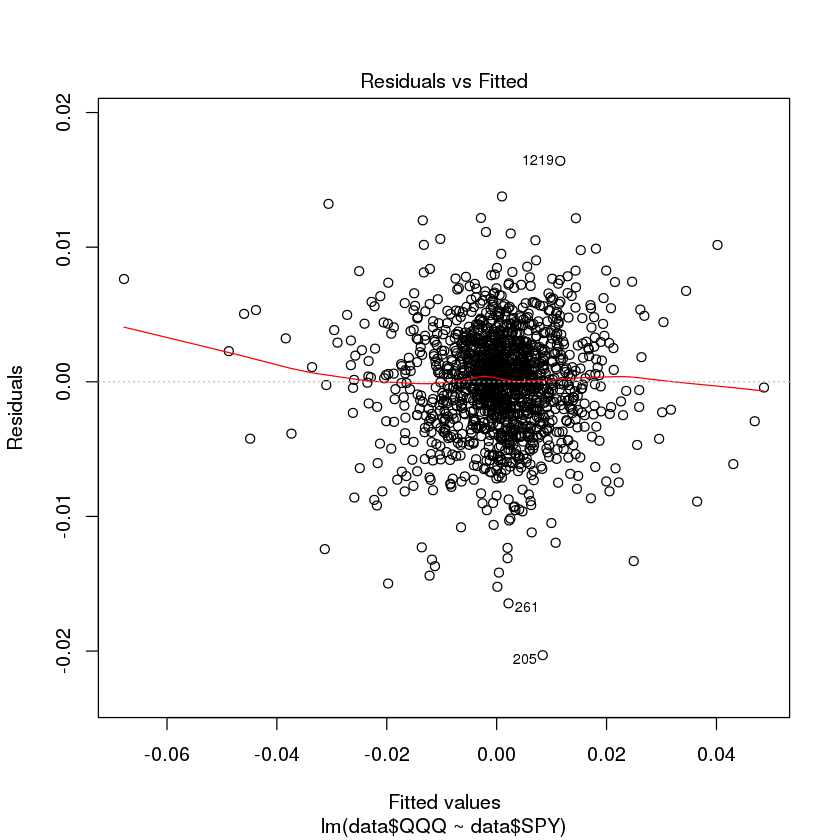

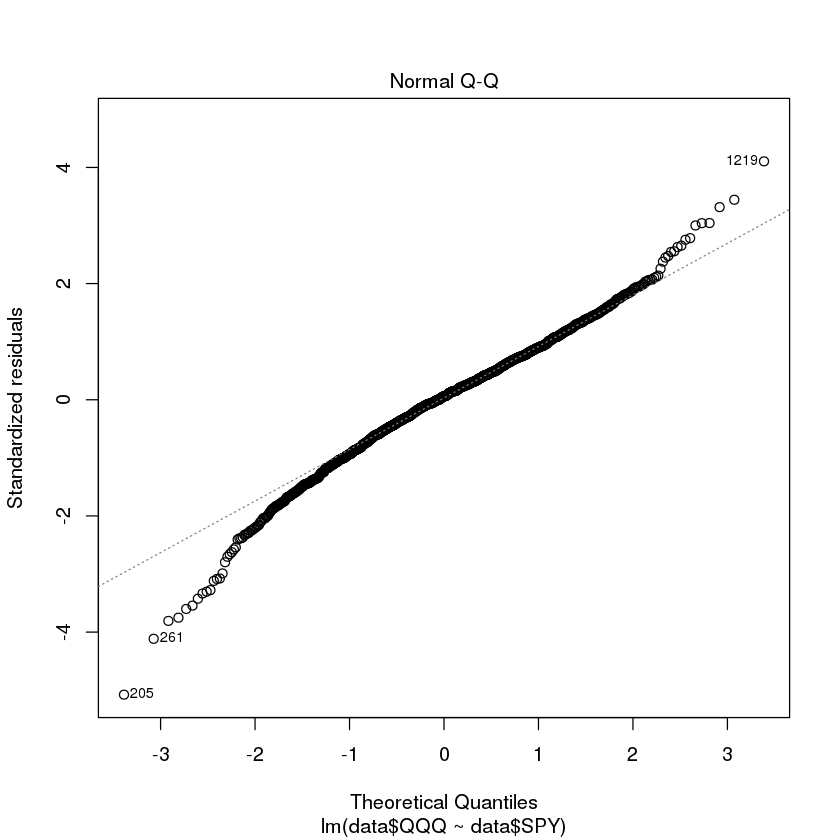

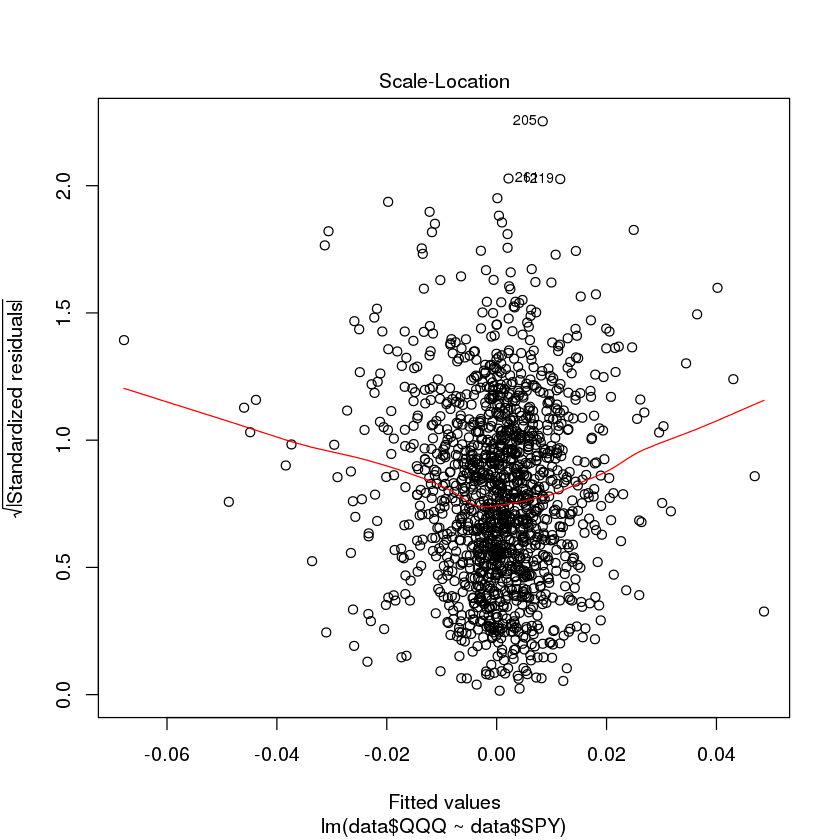

1             2             3             4             5 
 3.950501e-03  4.190820e-03  6.198943e-03  7.981194e-04  1.049058e-03 
            6             7             8             9            10 
-4.643188e-03  6.182319e-03 -4.218565e-03  2.646296e-03  6.743971e-03 
           11            12            13            14            15 
 3.373435e-03 -1.365532e-03  5.423967e-04  1.622406e-03  8.744349e-04 
           16            17            18            19            20 
-1.529009e-03  3.773827e-04  1.091532e-02 -4.471251e-04  5.551595e-03 
           21            22            23            24            25 
-1.916327e-03 -1.920053e-03 -1.185652e-03  3.825558e-03  9.544758e-03 
           26            27            28            29            30 
-1.576817e-03  7.687486e-03  1.902747e-03 -1.010486e-02 -1.255954e-03 
           31            32            33            34            35 
 2.489907e-03  6.061441e-03  6.929816e-04  4.166527e-03  2.702757e-03 
           36            37            38            39            40 
-1.809519e-02  7.970939e-03  1.683286e-02 -1.868151e-03  2.446851e-03 
           41            42            43            44            45 
 3.079760e-03  6.651716e-03  4.871876e-03 -2.233628e-03  5.228686e-04 
           46            47            48            49            50 
 6.358478e-03  2.636659e-03 -3.156561e-03  6.718560e-03  3.247638e-03 
           51            52            53            54            55 
 2.305354e-03 -2.081470e-02 -6.283212e-03 -5.887959e-04  1.128614e-02 
           56            57            58            59            60 
 6.593704e-03 -1.727055e-02  2.359803e-03  1.810177e-02 -7.689924e-03 
           61            62            63            64            65 
-8.063814e-03  9.259350e-03 -1.366519e-03 -1.918156e-02  7.357111e-03 
           66            67            68            69            70 
-6.171319e-03 -1.182671e-02 -1.918927e-02  1.394042e-02 -6.047333e-04 
           71            72            73            74            75 
 1.630109e-02 -3.490529e-03  3.115628e-03  1.010874e-02  3.318035e-03 
           76            77            78            79            80 
-2.414593e-03  7.139900e-03  7.330508e-03 -1.285537e-03  4.537108e-03 
           81            82            83            84            85 
 9.921870e-04 -2.672175e-05  3.419448e-03 -2.523752e-03 -3.469844e-03 
           86            87            88            89            90 
-3.011250e-03 -7.668805e-03  5.077359e-05  9.235258e-04  3.937044e-03 
           91            92            93            94            95 
-1.156656e-02  6.124523e-03  1.435514e-02  5.461271e-03 -9.622142e-04 
           96            97            98            99           100 
 9.109382e-03  6.942871e-03  3.514965e-03  2.583941e-03 -1.475778e-03 
          101           102           103           104           105 
-3.622713e-03 -6.788312e-03 -9.310890e-03  4.739179e-03  4.174392e-03 
          106           107           108           109           110 
 9.038540e-03 -1.085168e-02  5.098856e-03 -7.903240e-03 -6.486561e-03 
          111           112           113           114           115 
-2.605601e-05  9.455153e-03  2.615608e-03 -8.159984e-03 -1.197560e-02 
          116           117           118           119           120 
-7.391057e-04  3.609797e-03  4.938465e-03  4.131772e-03  1.099428e-02 
          121           122           123           124           125 
-2.330796e-02 -9.771655e-04 -1.024658e-02 -1.091124e-02 -5.164396e-04 
          126           127           128           129           130 
-4.238937e-03  8.093592e-03 -1.438517e-02  9.481735e-04  1.336841e-02 
          131           132           133           134           135 
-1.842887e-02  2.430722e-03 -1.918641e-03  5.469601e-03  1.443120e-02 
          136           137           138           139           140 
-6.156409e-03 -2.869120e-03 -1.198750e-02  9.429956e-03  1.375187e-02 
          141           142         

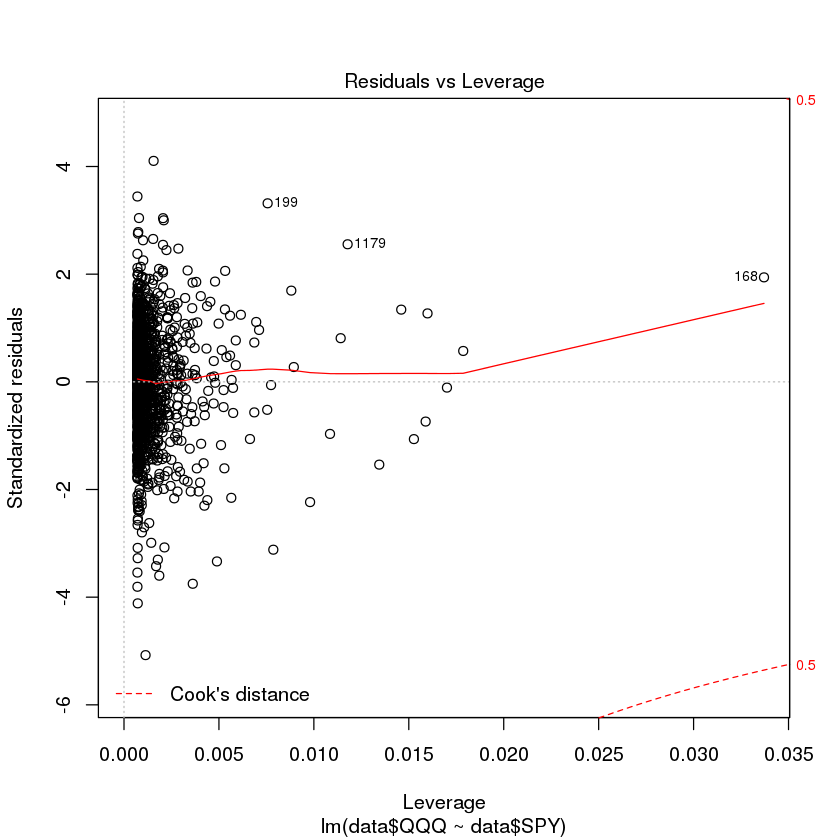

In [33]:
# 2. Choose one stock and print to the screen the predicted 
# returns as a function of market returns.
model <- lm(data$QQQ ~ data$SPY)
summary(model)
plot(model)
fitted(model)

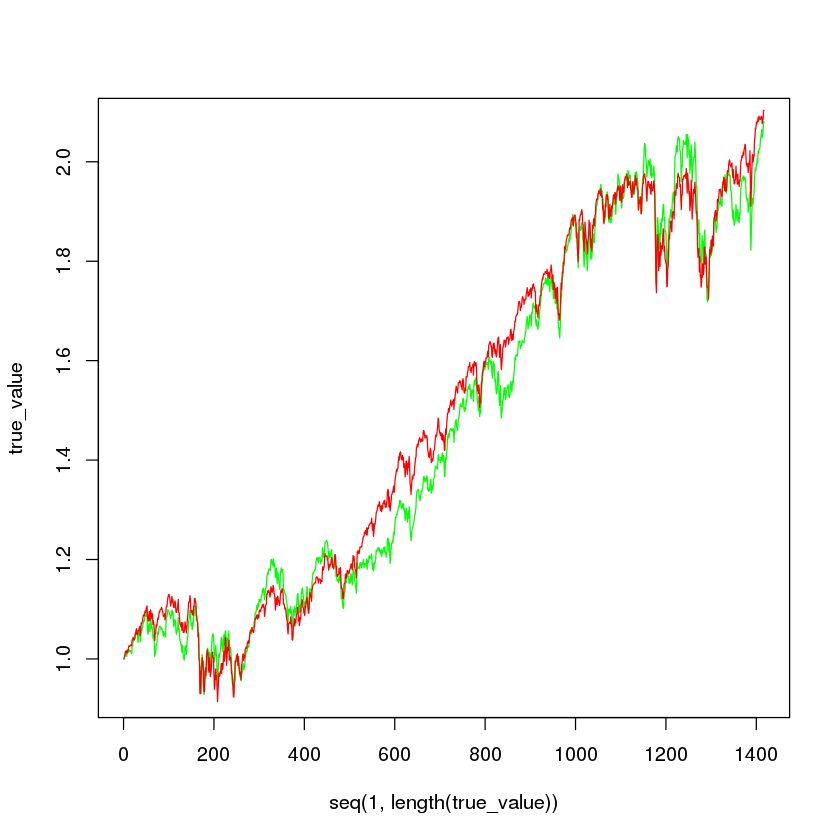

In [41]:
# 4. Create two time series, each starting at $1$, and 
# simulate their values under the predicted returns and 
# true returns. Comment on the differences.
true_value <- rep(1, dim(data)[1] + 1)
predicted_value <- rep(1, dim(data)[1] + 1)

predicted_returns <- fitted(model)

for(i in 1:dim(data)[1]){
    true_value[i+1] <- true_value[i]*(1 + data$QQQ[i])
    predicted_value[i+1] <- predicted_value[i]*(1 + predicted_returns[i])
}
plot(seq(1, length(true_value)), true_value, type="l", col="green")
lines(seq(1, length(true_value)), predicted_value, col="red")

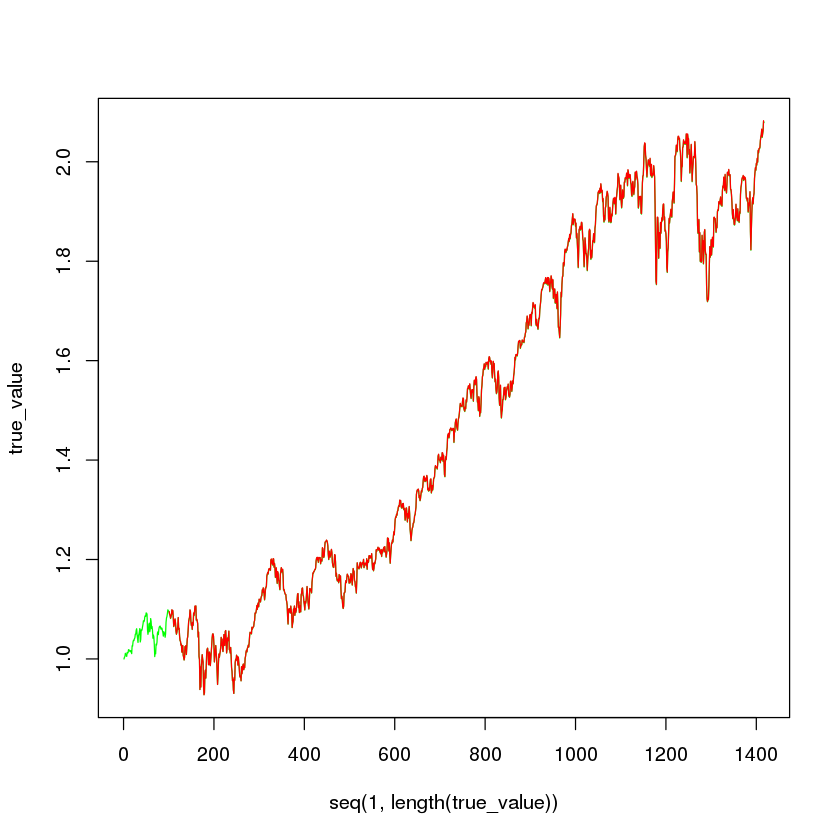

In [59]:
# 5. Write a loop starting from the $100$th row (**NOTE:** 
# there are days missing, but at least they are in order) 
# and for each following row, fit a new model using all past 
# returns. Use the fitted model to predict the next day's
# price based on the current days **true** price from
# problem 4. 
daily_prediction <- rep(1, length(true_value) - 100)
daily_predicted_return <- rep(1, length(true_value) - 100)
for(i in 101:length(true_value)){
    #true_value[i+1] <- true_value[i]*(1 + data$QQQ[i])
    # Fit a new model each period using the past data
    model <- lm(data$QQQ[1:i] ~ data$SPY[1:i])
    
    # The prediction is a function of expectation of excess
    # returns on the spy
    E_r_SPY <- mean(data$SPY[1:i])
    
    # Predict returns
    daily_predicted_return[i-100] <- model$coefficients[1] + model$coefficients[2]*E_r_SPY
    
    daily_prediction[i-100] <- true_value[i]*(1 + daily_predicted_return[i-100])
}
plot(seq(1, length(true_value)), true_value, type="l", col="green")
lines(seq(101, length(true_value)), daily_prediction, col="red")

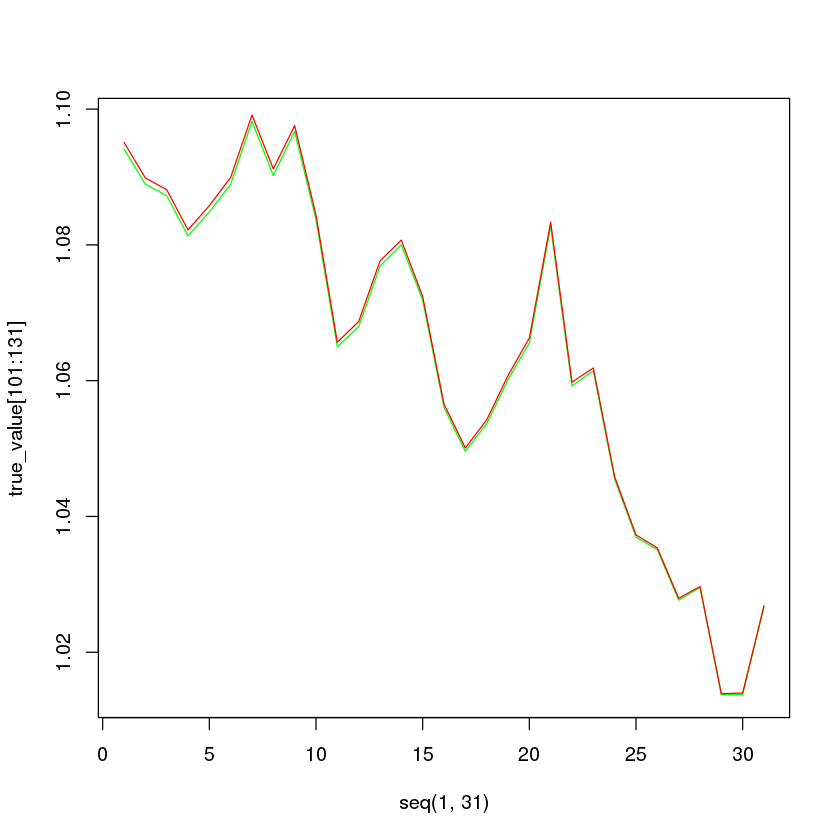

In [50]:
# It is hard to see the detail, since this graph covers 
# several year, but let's look at the first month of 
# predicted versus true values.
plot(seq(1, 31), true_value[101:131], type="l", col="green")
lines(seq(1, 31), daily_prediction[1:31], col="red")

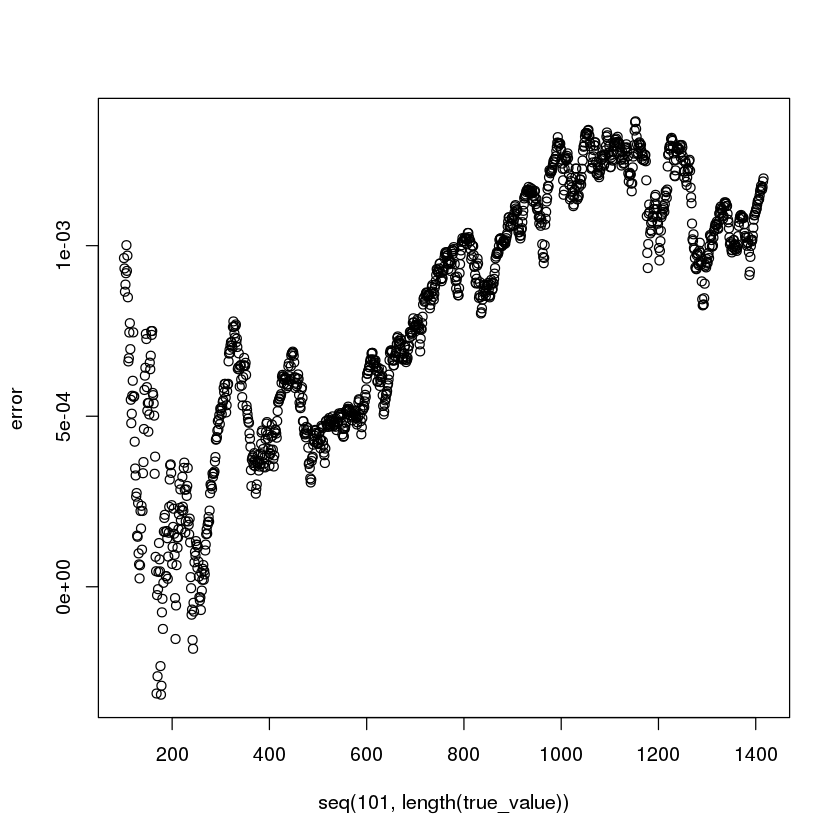

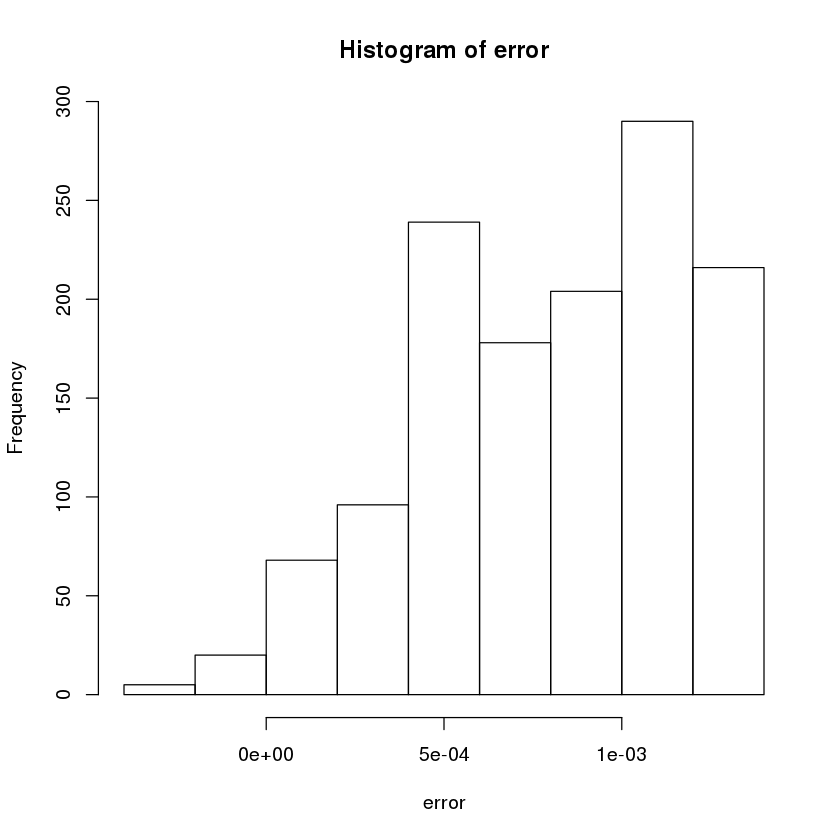

In [54]:
# This seems implausibly good... let's look at the difference
error <- daily_prediction - true_value[101:length(true_value)]
plot(seq(101, length(true_value)), error)
hist(error)

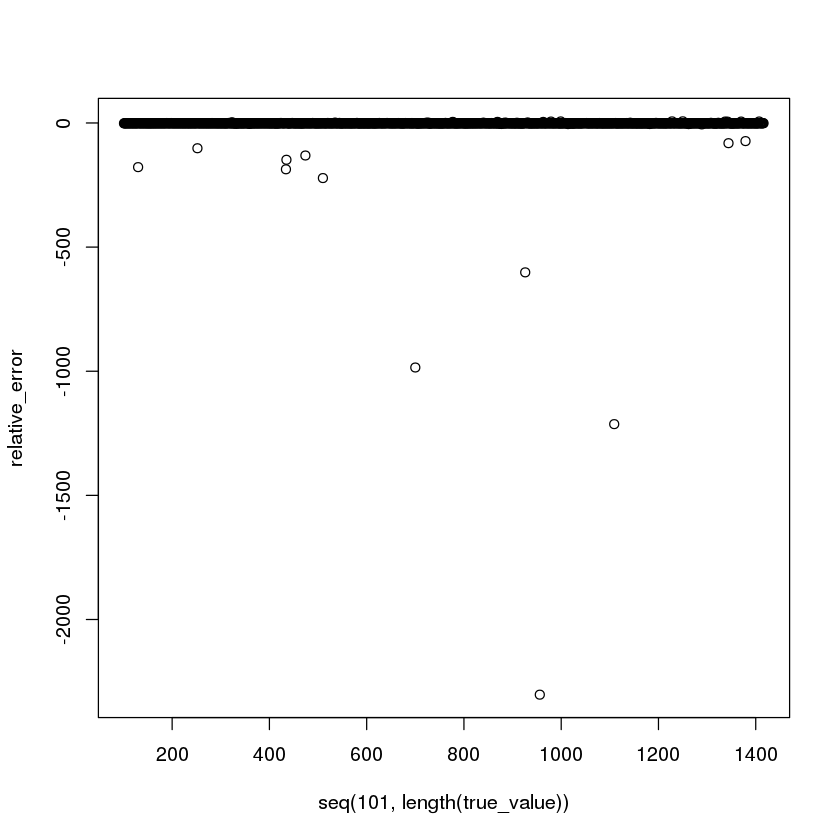

In [60]:
# We need a measure of relative error
relative_error <- (daily_predicted_return - data$QQQ[100:length(data$QQQ)])/data$QQQ[100:length(data$QQQ)]
plot(seq(101, length(true_value)), relative_error)
#hist(error)

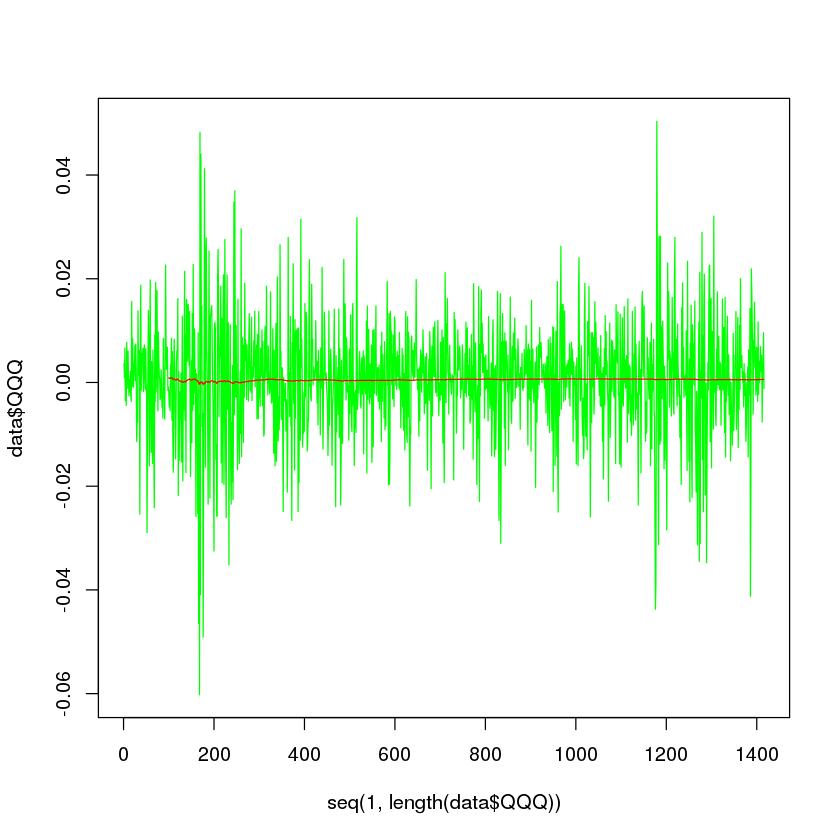

In [64]:
# So maybe we aren't so good after all! Or at least
# we can't rule out the existence of outliers
plot(seq(1, length(data$QQQ)), data$QQQ, type="l", col="green")
lines(seq(100, length(data$QQQ)), daily_predicted_return, col="red")

The model is dominated by the expected value of returns and the longer it runs, the more persistent it becomes. One option is to use a window, say $30$ days:

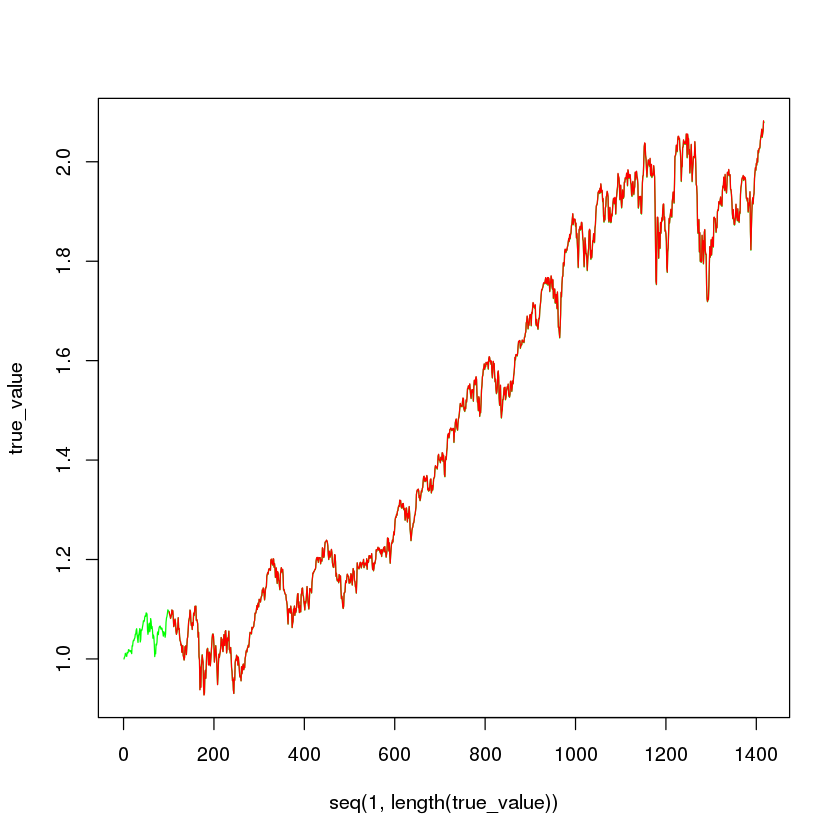

In [71]:
daily_prediction <- rep(1, length(true_value) - 100)
daily_predicted_return <- rep(1, length(true_value) - 100)

window_length <- 30

for(i in 101:length(true_value)){
    #true_value[i+1] <- true_value[i]*(1 + data$QQQ[i])
    # Fit a new model each period using the past data
    model <- lm(data$QQQ[i-window_length:i] ~ data$SPY[i-window_length:i])
    
    # The prediction is a function of expectation of excess
    # returns on the spy
    E_r_SPY <- mean(data$SPY[window_length:i])
    
    # Predict returns
    daily_predicted_return[i-100] <- model$coefficients[1] + model$coefficients[2]*E_r_SPY
    
    daily_prediction[i-100] <- true_value[i]*(1 + daily_predicted_return[i-100])
}
plot(seq(1, length(true_value)), true_value, type="l", col="green")
lines(seq(101, length(true_value)), daily_prediction, col="red")

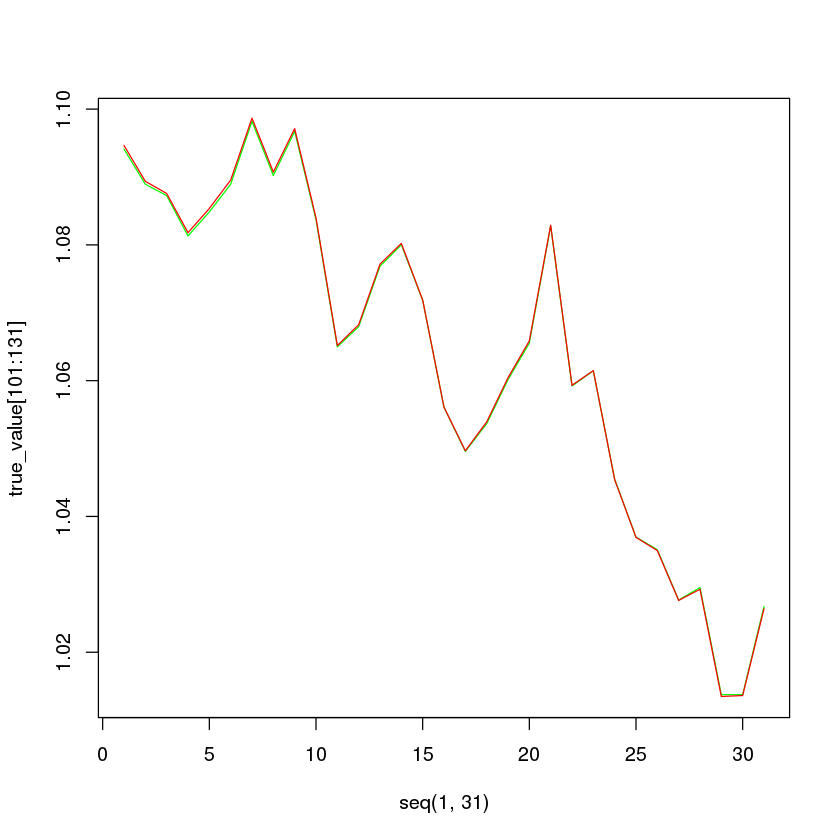

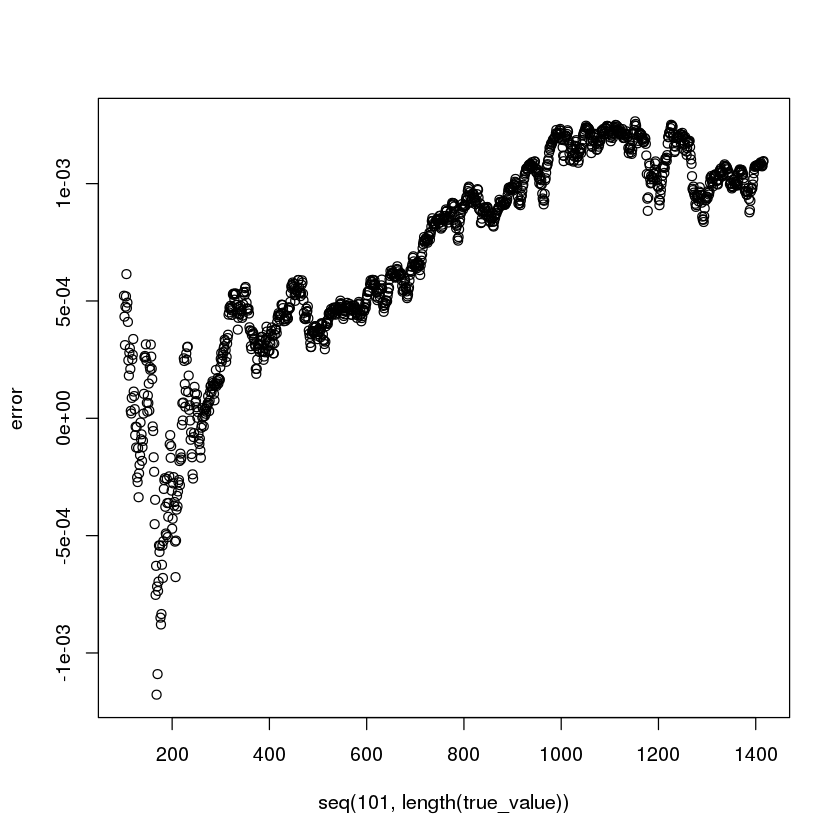

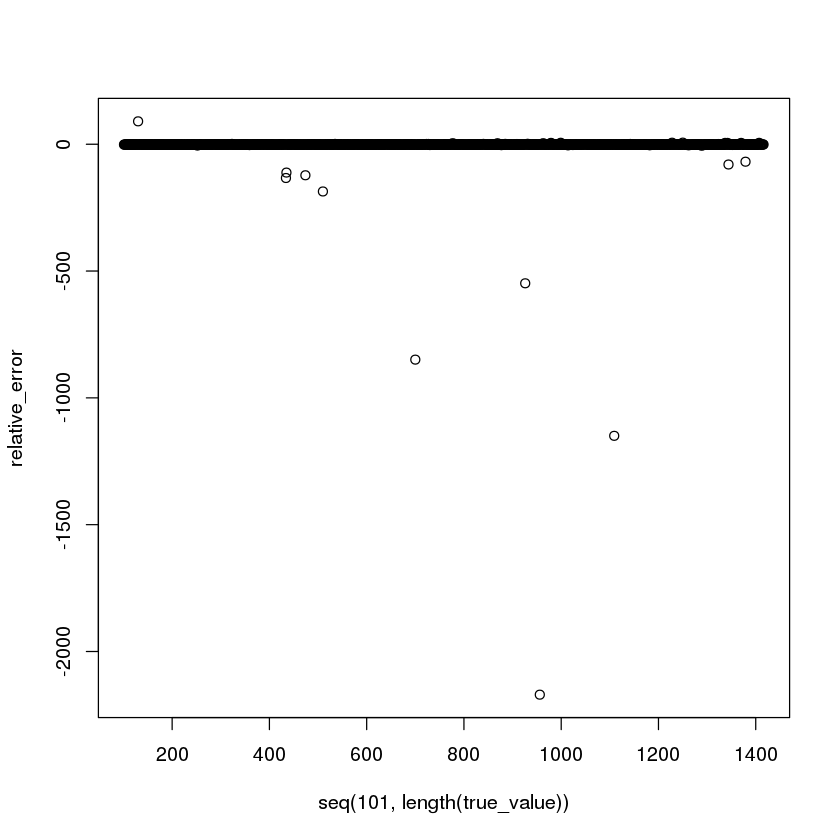

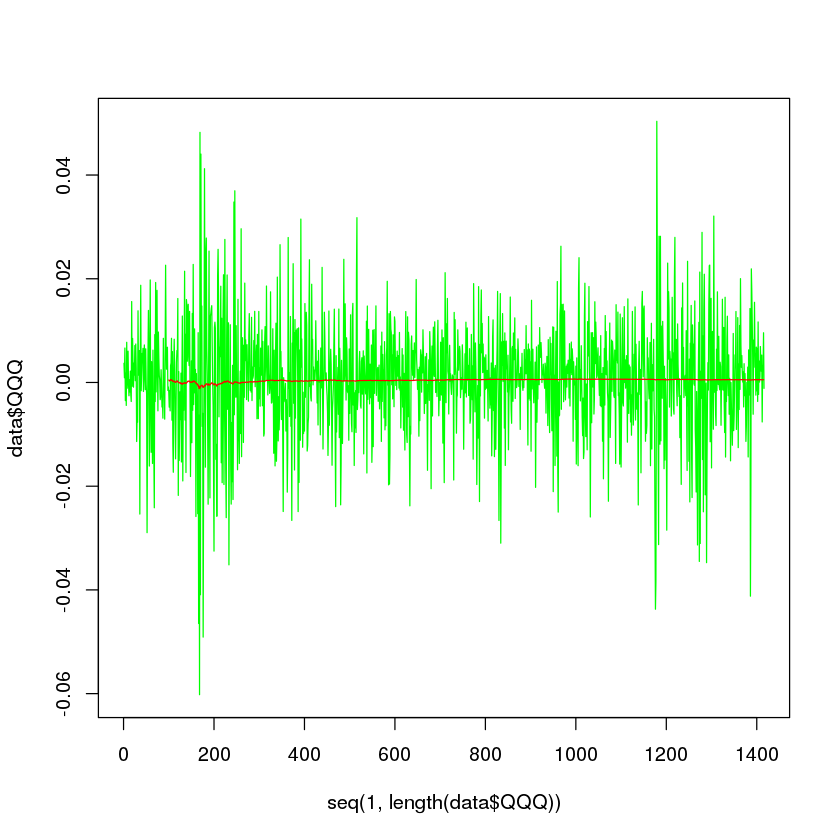

In [72]:
plot(seq(1, 31), true_value[101:131], type="l", col="green")
lines(seq(1, 31), daily_prediction[1:31], col="red")

error <- daily_prediction - true_value[101:length(true_value)]
plot(seq(101, length(true_value)), error)

relative_error <- (daily_predicted_return - data$QQQ[100:length(data$QQQ)])/data$QQQ[100:length(data$QQQ)]
plot(seq(101, length(true_value)), relative_error)

plot(seq(1, length(data$QQQ)), data$QQQ, type="l", col="green")
lines(seq(100, length(data$QQQ)), daily_predicted_return, col="red")